In [1]:
import torch.nn as nn
import torch
from torch.utils.data import Dataset, DataLoader
import torch.optim as optim

import jiahao

class NeuralNetwork(nn.Module):
    def __init__(self, array_size, n_classes):
        super(NeuralNetwork, self).__init__()
        self.array_size = array_size

        self.conv_layers = nn.Sequential(
            nn.Conv2d(1, 16, kernel_size=3, stride=2),
            nn.BatchNorm2d(16),
            nn.ReLU(),
            nn.Dropout(p=0.5),
            nn.Conv2d(16, 32, kernel_size=3, stride=2),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.Dropout(p=0.5),
            nn.Flatten(),
        )

        # Calculate the number of units needed in the first fully connected layer
        # based on the output shape of the convolutional layers
        with torch.no_grad():
            test_input = torch.zeros((1, 1, array_size, array_size))
            test_output = self.conv_layers(test_input)
            fc_input_size = test_output.shape[1] + 7
        # +7 because it will be cacantinate by 7
        
        self.fc_layers = nn.Sequential(
            nn.Linear(fc_input_size, 128),
            nn.Linear(128, 7)  # change n_classes to 7
        )

    def forward(self, inputs):
        image_input, info_input = inputs
        image_input = image_input.unsqueeze(1)  # add a channel dimension to the image input
        x = self.conv_layers(image_input)
        x = torch.cat((x, info_input), dim=1)
        x = self.fc_layers(x)
        return x

Track generation: 1127..1413 -> 286-tiles track
output action is: (0.0, 0.0, 0.0)
output action is: (0.0, 0.0, 0.0)
output action is: (0.0, 0.0, 0.0)
output action is: (0.0, 0.0, 0.0)
output action is: (0.0, 0.0, 0.0)
output action is: (0.0, 0.0, 0.0)
output action is: (0.0, 0.0, 0.0)
output action is: (0.0, 0.0, 0.0)
output action is: (1.0, 0.0, 0.0)
output action is: (1.0, 0.0, 0.0)
output action is: (1.0, 0.0, 0.0)
output action is: (1.0, 0.0, 0.0)
output action is: (1.0, 0.0, 0.0)
output action is: (1.0, 0.0, 0.0)
output action is: (1.0, 0.0, 0.0)
output action is: (1.0, 0.0, 0.0)
output action is: (1.0, 0.0, 0.0)
output action is: (1.0, 0.0, 0.0)
output action is: (1.0, 0.0, 0.0)
output action is: (1.0, 0.0, 0.0)
output action is: (1.0, 0.0, 0.4000000059604645)
output action is: (1.0, 0.0, 0.0)
output action is: (1.0, 0.0, 0.0)
output action is: (1.0, 0.0, 0.0)
output action is: (1.0, 0.0, 0.0)
output action is: (1.0, 0.0, 0.0)
output action is: (1.0, 0.0, 0.0)
output action is: (

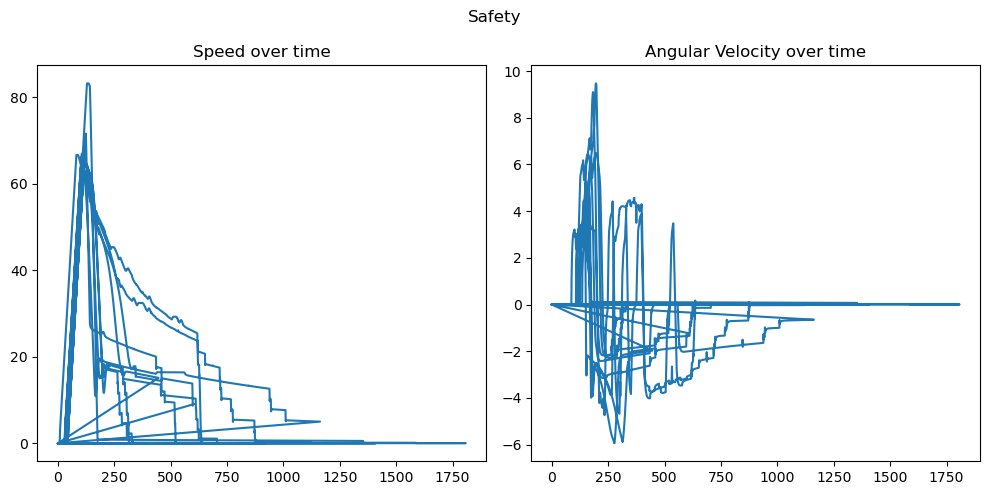

In [2]:
# Create an instance of the model
model = NeuralNetwork(array_size=96, n_classes=7)

# Load the saved state dict from a file
model.load_state_dict(torch.load('class_model/my_model.pt'))

model.eval()

simulation = jiahao.Simulation()
#simulation.run_simulation()
simulation.test_simulation(model)

In [ ]:
# Create an instance of the model
model = NeuralNetwork(array_size=96, n_classes=7)

# Load the saved state dict from a file
model.load_state_dict(torch.load('class_model/my_model.pt'))

model.eval()

simulation = jiahao.Simulation()
#simulation.run_simulation()
simulation.dagger(model)